In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)
data = pd.read_csv("bestsellers_with_categories.csv")
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
# Виведіть розміри датасету (використовуйте атрибут shape)
data.shape

(550, 7)

In [7]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [8]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
na_counts = data.isna().sum()
na_counts
# ні: Чи є в якихось змінних пропуски?

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [13]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = data['genre'].unique()
print(unique_genres, 'Які є унікальні жанри?')


['Non Fiction' 'Fiction'] Які є унікальні жанри?


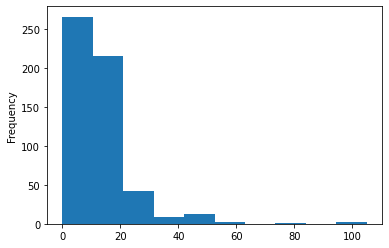

In [10]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
data['price'].plot(kind='hist', bins=10)
plt.show()

In [12]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print('Максимальна ціна: ', max_price)
print('Мінімальна ціна: ', min_price)
print('Середня ціна: ', mean_price)
print('Медіанна ціна: ', median_price)

Максимальна ціна:  105
Мінімальна ціна:  0
Середня ціна:  13.1
Медіанна ціна:  11.0


In [14]:
max_rating = data['user_rating'].max()
print('Який рейтинг у датасеті найвищий?:', max_rating)

Який рейтинг у датасеті найвищий?: 4.9


In [16]:
count_5_star = data['user_rating'].value_counts()[4.9]
print('Кількість книг з рейтингом 4.9: ', count_5_star)

Кількість книг з рейтингом 4.9:  52


In [34]:
max_reviews_index = data['reviews'].max()
book_with_max_reviews = data.loc[max_reviews_index, 'name']

print('Книга з найбільшою кількістю відгуків: ', book_with_max_reviews)

KeyError: 87841

In [35]:
# Фільтрація книг, які потрапили до Топ-50 у 2015 році
top_books_2015 = data.loc[(data['year'] == 2015) & (data['rank'] <= 50)]

# Сортування книг за ціною
top_books_2015_sorted = top_books_2015.sort_values('price', ascending=False)

# Визначення назви найдорожчої книги
most_expensive_book = top_books_2015_sorted.iloc[0]['name']

# Виведення результату
print('Найдорожча книга серед Топ-50 книг 2015 року: ', most_expensive_book)

KeyError: 'rank'